# MNIST Classifier Using an MLP - Hello World of ML!
<hr/>

## Introduction

This notebook is inffixed with __LEVEL HERO DEMO__ because it is deployable high performant ML classifier for the [MNIST](https://paperswithcode.com/dataset/mnist) dataset. This set is presented by your instructor during the lecture. Please confer to the lecture notes for further details.

This notebook is a __demonstration notebook__ to: 
- test your DEV environment,
- show you how developing a ML model can be very simple,
- show you how a simple MLP can achieve quite-human performance in the simple task of recognizing hand-written digits.

>__Note:__
>
>One can see the suffix __CPU__ to indicate that the NN architecture was lowered to allow a training on common CPU devices. Indeed, a __MLP__ is used here instead of a proper CNN architecture. Thus, the performances are downgraded compared to a __CNN__ model trained on a __GPU__ device. 


## Imports

In [1]:
import os
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf ; tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical

2025-03-06 12:46:52.880574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 12:46:52.884031: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 12:46:52.894774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741265212.911992  413268 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741265212.916694  413268 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 12:46:52.933280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Notebook parameters

In [2]:
# NumPy

np.set_printoptions(linewidth=200) # to enlarge the print() line
np.random.seed(42) # the random seed init
np.set_printoptions(precision=3) # for numpy floats: number of decimals

# to suppress scientific notations like 1.500e+00 
# np.set_printoptions(suppress=True)

# TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to disable TF debug logging messages 

## Globals & hyperparameters

In [3]:
# =============
# DATA_TOPDIR
# =============

# Contain the (un)compressed idx files of MNIST

# on assieoussou (my machine)
DATA_TOPDIR = "/home/ml/datasets/mnist"

# on your machine.... 

# =======
# MNIST 
# =======

# dataset files
TRAIN_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-images-idx3-ubyte")
TRAIN_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-labels-idx1-ubyte")
TEST_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-images-idx3-ubyte")
TEST_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-labels-idx1-ubyte")

# The MNIST images format
num_pixels = 28 * 28

# the total number of digits
num_classes = 10

# ==========================
# Training hyperparameters
# ==========================

epochs = 10
batch_size = 2 # <= on CPU

# =======
# Demo 
# =======

# Demo dir: where demonstration images are placed
DEMO_DIR = os.path.join(DATA_TOPDIR, "demo")
os.makedirs(DEMO_DIR, exist_ok=True)

# for demo images 
nb_demo = 10
demo_prefix = "demo_img_"


## Data Preparation (Part I)

>__Note:__
>
>In this notebook, all the steps regarding the understanding of the data are skipped. Indeed, in practice Data Scientist spend __80%__ of their time here!



In [4]:
# 1. Read each dataset into a conventional numpy 2D array
train_x_ndarray = idx2numpy.convert_from_file(TRAIN_IMAGES_DATASET_FILE)
train_y_ndarray = idx2numpy.convert_from_file(TRAIN_LABELS_DATASET_FILE)

test_x_ndarray = idx2numpy.convert_from_file(TEST_IMAGES_DATASET_FILE)
test_y_ndarray = idx2numpy.convert_from_file(TEST_LABELS_DATASET_FILE)

# let us create a validation set from the training one: 

valid_size = 10000
valid_x_ndarray = train_x_ndarray[:valid_size]
valid_y_ndarray = train_y_ndarray[:valid_size]

# remove from train
train_x_ndarray = train_x_ndarray[valid_size:]
train_y_ndarray = train_y_ndarray[valid_size:]

print(train_x_ndarray.shape, train_y_ndarray.shape)
print(valid_x_ndarray.shape, valid_y_ndarray.shape)
print(test_x_ndarray.shape, test_y_ndarray.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


train_x_ndarray[0] = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  29 150 195 254 255 254 176 193 150  96   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  48 166 224 253 253 234 196 253 253 253 253 233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  93 244 249 253 187  46  10   8   4  10 194 253 253 233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 107 253 253 230  48   0   0   0   0 

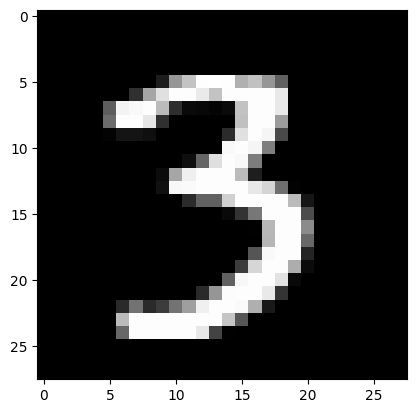

In [5]:
# quick check 
plt.imshow(train_x_ndarray[0], cmap='gray')
print(f"train_x_ndarray[0] = \n{train_x_ndarray[0]}, \ntrain_y_ndarray[0] = {train_y_ndarray[0]}" )

## Model construction & configuration

In [6]:
def build_model():
    model = Sequential()
    # =================================
    # Feature extractor
    # =================================
    model.add(Dense(
        units=64, 
        input_dim=num_pixels, # <=> input_shape=(num_pixels,),
        activation="relu")
    )   
    # =================================
    # Head/Output 
    # =================================
    model.add(Dense(units=num_classes, activation="relu"))
    # =================================
    # Compile model
    # =================================
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# Construct the model and show it
model = build_model()
model.summary()

/home/kla/Workspace/training/become-ai-dev-part-1/Module-03/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-06 12:46:56.071786: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

## Data Preparation (Part II)

>__Note:__
>
> Now we know our taget ML model; thus we need to finalize the preparation of our data according this model (see the Input layer defined by `input_dim=num_pixels=28*28`). We don't have to do a lot of work since the original images format is quite similar.

In [7]:
# 1. reshape
X_train = train_x_ndarray.reshape(train_x_ndarray.shape[0], num_pixels).astype('float32')
X_valid = valid_x_ndarray.reshape(valid_x_ndarray.shape[0], num_pixels).astype('float32')
X_test = test_x_ndarray.reshape(test_x_ndarray.shape[0], num_pixels).astype('float32')

# 2. normalization
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

# 3. one hot encoding
y_train = to_categorical(train_y_ndarray)
y_valid = to_categorical(valid_y_ndarray)
y_test = to_categorical(test_y_ndarray)

assert y_train.shape[1] == num_classes, f"[FATAL] The number of classes should be equal to {num_classes}. Abort!"

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_train.shape)

(50000, 784) (50000, 10)
(10000, 784) (10000, 10)
(10000, 784) (50000, 10)


## Model Training & Evaluation

In [9]:
# Fit the model
model.fit(
    x=X_train, 
    y=y_train,
    batch_size=batch_size,
    validation_data=(X_valid, y_valid), 
    epochs=epochs,   
    verbose=2
)

# Final evaluation of the model
scores = model.evaluate(
    x=X_test, 
    y=y_test, 
    verbose=0
)

print("\n[INFO] Model Val Accuracy: %.2f%%, Error: %.2f%%" % (scores[1]*100, 100-scores[1]*100))

Epoch 1/10
25000/25000 - 34s - 1ms/step - accuracy: 0.0984 - loss: nan
Epoch 2/10


KeyboardInterrupt: 

## Construct the demonstration set

Here, we isolate in the `demo/` subdirectory, some testing images. We'll use them later on - once our model is trained - to demonstrate how accurate it is. 

In [ ]:
def reconstruct_demo_dir(nb, from_set, target_dir):
    # randomly collect the indices
    demo_rnd_indices = np.random.randint(1, high=len(from_set), size=nb)
    for i in demo_rnd_indices:
        plt.imsave(os.path.join(target_dir, demo_prefix + str(i) + ".jpg"), from_set[i], cmap='gray')
    print(f"[INFO] {len(demo_rnd_indices)} images have been created in {target_dir}")        

# check if the demo dir exists and contains at least nb_demo files

if os.path.exists(DEMO_DIR): 
    nb_files = len([name for name in os.listdir(DEMO_DIR) if os.path.isfile(os.path.join(DEMO_DIR, name))])
    if nb_files < nb_demo:
        # So you can safely manually add demo file 
        reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)
    else:
        print(f"[INFO] Nothing to do because {DEMO_DIR} contains already enough images!")
else: 
    reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)